# Deep Learning with Tensorflow

Classical machine learning relies on using statistics to determine relationships between features and labels, and can be very effective for creating predictive models. However, a massive growth in the availability of data coupled with advances in the computing technology required to process it has led to the emergence of new machine learning techniques that mimic the way the brain processes information in a structure called an artificial neural network.

## Creating a Neural Network with Tensorflow

Tensorflow is a framework for creating machine learning models, including deep neural networks (DNNs). In this example, we'll use Tensorflow to create a simple neural network that classifies penguins into species based on the length and depth of their culmen (bill), their flipper length, and their body mass.

> **Citation**: The penguins dataset used in the this exercise is a subset of data collected and made available by [Dr. Kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a
member of the [Long Term Ecological Research
Network](https://lternet.edu/).

### Exploring the Dataset

Before we start using Tensorflow to create a model, let's load the data we need from the Palmer Islands penguins dataset, which contains observations of three different species of penguin.

> **Note**: In reality, you can solve the penguin classification problem easily using classical machine learning techniques without the need for a deep learning model; but it's a useful, easy to understand dataset with which to demonstrate the principles of neural networks in this notebook.

In [1]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('data/penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to triple its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
339,55.8,19.8,20.7,40.00,2
81,42.9,17.6,19.6,47.00,0
98,33.1,16.1,17.8,29.00,0
302,50.5,18.4,20.0,34.00,2
324,51.5,18.7,18.7,32.50,2
269,48.8,16.2,22.2,60.00,1
237,50.8,17.3,22.8,56.00,1
335,45.6,19.4,19.4,35.25,2
38,37.6,19.3,18.1,33.00,0
167,49.3,15.7,21.7,58.50,1


The **Species** column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2. The following code shows the actual species to which these class labels corrrespond.

In [2]:
penguin_classes = ['Amelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 49.6 15.0 21.6 47.5 1 ] Gentoo
[ 37.5 18.9 17.9 29.75 0 ] Amelie
[ 46.0 21.5 19.4 42.0 0 ] Amelie
[ 38.2 18.1 18.5 39.5 0 ] Amelie
[ 52.1 17.0 23.0 55.5 1 ] Gentoo
[ 39.6 18.8 19.0 46.0 0 ] Amelie
[ 46.1 13.2 21.1 45.0 1 ] Gentoo
[ 46.8 16.1 21.5 55.0 1 ] Gentoo
[ 51.3 19.9 19.8 37.0 2 ] Chinstrap
[ 47.6 14.5 21.5 54.0 1 ] Gentoo


As is common in a supervised learning problem, we'll split the dataset into a set of records with which to train the model, and a smaller set with which to validate the trained model.

In [3]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Amelie)
[42.5 20.7 19.7 45. ] 0 (Amelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Amelie)
[37.8 17.1 18.6 33. ] 0 (Amelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Amelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Amelie)
[41.1  19.   18.2  34.25] 0 (Amelie)
[33.1 16.1 17.8 29. ] 0 (Amelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Amelie)


The *features* are the cupmen measurements for each penguin observation, and the *label* is a numeric value that indicates the species of penguin that the observation represents (Amelie, Gentoo, or Chinstrap).

### Import Tensorflow Libraries

Since we plan to use Tensorflow to create our penguin classifier, we'll need to install and import the libraries we intend to use. Tensorflow is already installed in your environment, so we just need to import the libraries we need.

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.4.0
TensorFlow version: 2.3.0


### Prepare the Data for Tensorflow
We've already loaded our data and split it into training and validation datasets. However, we need to do some further data preparation so that our data will work correctly with Tensorflow. Specifically, we need to set the data type of our features to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values.

In [5]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


### Define a Neural Network

Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:
* An input layer that receives an input value for each feature (in this case, the length and depth of the penguin's culmen) and applies a *ReLU* activation function.
* A hidden layer that receives ten inputs and applies a *ReLU* activation function.
* An output layer that uses a *SoftMax* activation function to generate an output for each penguin species (which represent the classification probabilities for each of the three possible penguin species)

In [6]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


### Train the Model
To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll apply an Adam optimizer to a categorical cross-entropy loss function iteratively over 50 epochs.

In [7]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 0s 2ms/step - loss: 23.8942 - accuracy: 0.1912 - val_loss: 11.2900 - val_accuracy: 0.2165
Epoch 2/50
96/96 [==============================] - 0s 963us/step - loss: 5.0865 - accuracy: 0.2142 - val_loss: 1.5626 - val_accuracy: 0.1752
Epoch 3/50
96/96 [==============================] - 0s 971us/step - loss: 1.2712 - accuracy: 0.2727 - val_loss: 1.1591 - val_accuracy: 0.3139
Epoch 4/50
96/96 [==============================] - 0s 1ms/step - loss: 1.1068 - accuracy: 0.3814 - val_loss: 1.0832 - val_accuracy: 0.4453
Epoch 5/50
96/96 [==============================] - 0s 1ms/step - loss: 1.0432 - accuracy: 0.4598 - val_loss: 1.0545 - val_accuracy: 0.4574
Epoch 6/50
96/96 [==============================] - 0s 1ms/step - loss: 1.0258 - accuracy: 0.5183 - val_loss: 1.0425 - val_accuracy: 0.4842
Epoch 7/50
96/96 [==============================] - 0s 949us/step - loss: 1.0118 - accuracy: 0.5601 - val_loss: 1.0315 - val_accuracy: 0.5547
Epoch 8/50
9

### Review Training and Validation Loss
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:
* The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
* The training loss and validations loss should follow a similar trend, showing that the model is not overfitting to the training data.

Let's plot the loss metrics and see:

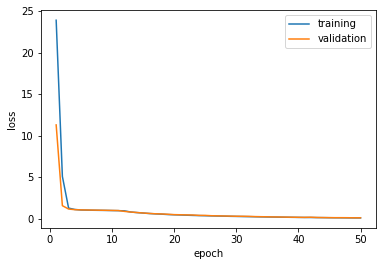

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### View the Learned Weights and Biases
The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:
* Layer 1: There are two input values going to ten output nodes, so there should be 2 x 10 weights and 10 bias values.
* Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
* Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

In [9]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.27236846 -0.3841947   0.03324002  0.08020484 -0.10909867  0.05677455
  -0.19284697  0.8463791   0.3579434  -0.4905011 ]
 [ 0.27471453  0.21265197  0.08151422 -0.17707926 -0.10406601  0.80808717
   0.34789595 -0.05428061 -0.6077912  -0.5447268 ]
 [-0.28836262 -0.634329    0.2833845   0.34767175  0.23550075 -0.0121211
   0.14559275 -0.79786915 -0.5164285   0.3296095 ]
 [-0.42851955 -0.24623463 -0.28597653 -0.5230521  -0.43773973  0.3698576
  -0.0764817   0.23638228  0.75253874 -0.4691702 ]] 
Biases:
 [ 0.          0.         -0.01292539  0.          0.          0.20184615
 -0.19173318 -0.2613486  -0.31521466  0.        ]
------------
Weights:
 [[ 0.0607031  -0.30530828  0.39975524  0.3037489   0.15896738  0.03326017
  -0.53190327  0.40915883 -0.03316814 -0.1240823 ]
 [ 0.42301047  0.14984506 -0.54566675  0.3919103  -0.4295466   0.50397205
  -0.31616646  0.17803025 -0.41518384 -0.38429344]
 [ 0.5336163   0.37752342 -0.4694244   0.17206895 -0.04215616  0.5297911

### Evaluate Model Performance
So, is the model any good? The raw accuracy reported from the validation data would seem to indicate that it predicts pretty well; but it's typically useful to dig a little deeper and compare the predictions for each possible class. A common way to visualize the performace of a classification model is to create a *confusion matrix* that shows a crosstab of correct and incorrect predictions for each class.

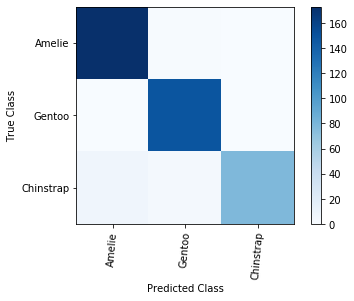

In [10]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

### Using the Model with New Data

Now that we have a model we believe is reasonably accurate, we can use it to predict the species of new penguin observations:

In [11]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)

# Load the saved model when required
del model  # deletes the existing model variable
model = models.load_model(modelFileName) # loads the saved model

x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
Gentoo


## Learn More
This notebook was designed to help you understand the basic concepts and principles involved in deep neural networks, using a simple Tensorflow example. To learn more about Tensorflow, take a look at the <a href="https://www.tensorflow.org/" target="_blank">Tensorflow web site</a>.